<a href="https://colab.research.google.com/github/ykato27/PyPortfolioOpt/blob/main/PyPortfolioOpt_Hierarchical_Risk_Parity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Risk Parity

HRP is a modern portfolio optimization method inspired by machine learning.

The idea is that by examining the hierarchical structure of the market, we can better diversify. 

In this cookbook recipe, we will cover:

- Downloading data for HRP
- Using HRP to find the minimum variance portfolio
- Plotting dendrograms



## Downloading data

HRP only requires historical returns

In [1]:
!pip install PyPortfolioOpt
!pip install yfinance

     |████████████████████████████████| 61kB 2.4MB/s 
     |████████████████████████████████| 1.3MB 5.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736245 sha256=eb7c3775cae56c785da98252670e551d3b850b998cfa2cd1cfc46597dceb202e
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31
     |████████████████████████████████| 6.3MB 4.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=0283c5c0e653113edd2ed28e65caa5c9be27b26d8c3a5d24977ac7b388e13b0b
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  F

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.4.2'

In [3]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  15 of 15 completed


,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2021-06-25,133.110001,85.620003,41.619999,874.030029,84.080002,178.350006,486.089996,78.230003,379.609985,761.239990,9.00,240.550003,178.100006,59.580002,138.529999
2021-06-28,134.779999,87.080002,41.560001,878.739990,84.120003,176.570007,486.989990,77.120003,367.679993,799.400024,8.89,241.259995,177.070007,59.509998,138.100006
2021-06-29,136.330002,89.519997,40.889999,873.530029,83.489998,173.929993,491.399994,79.750000,368.000000,801.070007,8.85,241.850006,176.729996,59.259998,137.300003
2021-06-30,136.960007,93.930000,41.230000,874.969971,83.440002,175.770004,490.170013,79.809998,365.089996,800.099976,8.77,241.740005,174.839996,58.500000,141.020004
2021-07-01,137.270004,93.309998,41.540001,879.229980,82.220001,177.259995,491.049988,77.440002,370.709991,808.479980,8.78,243.470001,175.479996,58.779999,139.320007


In [4]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2021-06-25,-0.002249,-0.005575,0.019348,0.007713,0.003701,0.002361,0.007190,0.044459,0.012969,-0.009086,0.000000,0.002960,0.002420,0.005909,0.011833
2021-06-28,0.012546,0.017052,-0.001442,0.005389,0.000476,-0.009980,0.001851,-0.014189,-0.031427,0.050129,-0.012222,0.002952,-0.005783,-0.001175,-0.003104
2021-06-29,0.011500,0.028020,-0.016121,-0.005929,-0.007489,-0.014952,0.009056,0.034103,0.000870,0.002089,-0.004499,0.002446,-0.001920,-0.004201,-0.005793
2021-06-30,0.004621,0.049263,0.008315,0.001648,-0.000599,0.010579,-0.002503,0.000752,-0.007908,-0.001211,-0.009040,-0.000455,-0.010694,-0.012825,0.027094
2021-07-01,0.002263,-0.006601,0.007519,0.004869,-0.014621,0.008477,0.001795,-0.029695,0.015393,0.010474,0.001140,0.007156,0.003660,0.004786,-0.012055


## HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.

In [5]:
from pypfopt import HRPOpt

In [6]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.03464),
             ('AMD', 0.01777),
             ('BAC', 0.04579),
             ('BLK', 0.04877),
             ('CVS', 0.09385),
             ('DIS', 0.06757),
             ('INTU', 0.03228),
             ('JD', 0.05242),
             ('MA', 0.04951),
             ('NVDA', 0.0171),
             ('PBI', 0.0827),
             ('TGT', 0.08809),
             ('TM', 0.11073),
             ('UL', 0.1534),
             ('WMT', 0.10538)])

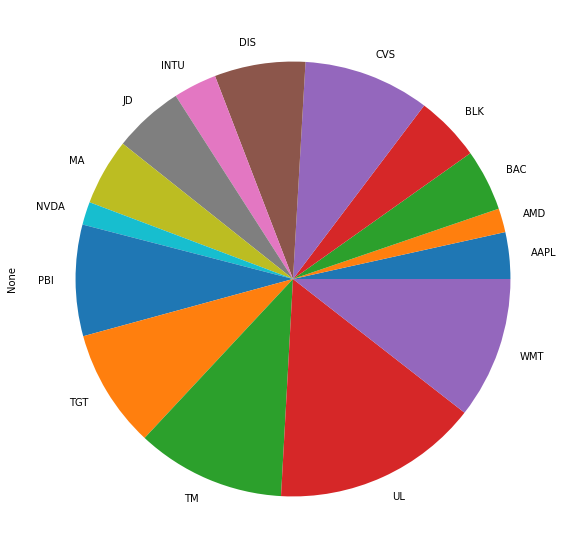

In [7]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [8]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 20.1%
Annual volatility: 19.0%
Sharpe Ratio: 0.96


## Plotting

It is very simple to plot a dendrogram (tree diagram) based on the hierarchical structure of asset returns

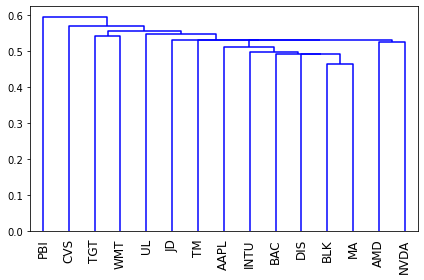

In [9]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp); 

If you look at this dendogram closely, you can see that most of the clusters make a lot of sense. For example, AMD and NVDA (both semiconductor manufacturers) are grouped.